In [ ]:
!pip install fbprophet
!pip install -U statsmodels
!pip install colorama

     |████████████████████████████████| 9.8 MB 5.3 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
##Importing Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose as sd
from scipy import stats 
from statsmodels.graphics.gofplots import qqplot as qq
from scipy.stats import kurtosis
import scipy
from statsmodels.tsa.stattools import adfuller
from pylab import rcParams
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pandas.core.window.rolling import Rolling
from sklearn.model_selection import train_test_split as split
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm
import warnings
import itertools
warnings.filterwarnings("ignore")
from statsmodels.stats.diagnostic import acorr_ljungbox
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error, mean_squared_log_error
from sklearn.model_selection import KFold, ShuffleSplit, StratifiedKFold, StratifiedShuffleSplit, TimeSeriesSplit
from fbprophet import Prophet
from IPython import display
from matplotlib import pyplot
import os
import re
from colorama import Fore, Back, Style
import seaborn as sns
import plotly.express as px
import warnings
from matplotlib.patches import Patch

In [ ]:
##Matplotlib Parameters
import matplotlib.ticker as ticker
rcParams['axes.labelsize'] = 12
rcParams['xtick.labelsize'] = 12
rcParams['ytick.labelsize'] = 12
plt.style.context('fivethirtyeight')

In [ ]:
!gdown 1LE8v0YGB4pl3weqRts4jU8CH4laSaU7U

Downloading...
From: https://drive.google.com/uc?id=1LE8v0YGB4pl3weqRts4jU8CH4laSaU7U
To: /content/NSEI.csv
100% 267k/267k [00:00<00:00, 77.5MB/s]


In [ ]:
data = pd.read_csv('/content/NSEI.csv')
data.head()



,Date,Open,High,Low,Close,Adj Close,Volume
0,2008-01-07,6271.000000,6289.799805,6193.350098,6279.100098,6279.100098,0.0
1,2008-01-08,6282.450195,6357.100098,6221.600098,6287.850098,6287.850098,0.0
2,2008-01-09,6287.549805,6338.299805,6231.250000,6272.000000,6272.000000,0.0
3,2008-01-10,6278.100098,6347.000000,6142.899902,6156.950195,6156.950195,0.0
4,2008-01-11,6166.649902,6224.200195,6112.549805,6200.100098,6200.100098,0.0


In [ ]:
data.describe()


,Open,High,Low,Close,Adj Close,Volume
count,3422.000000,3422.000000,3422.000000,3422.000000,3422.000000,3.422000e+03
mean,8107.686704,8154.576814,8046.048898,8100.923831,8100.923831,1.925467e+05
std,3363.056987,3368.289578,3348.141256,3358.727079,3358.727079,2.224431e+05
min,2553.600098,2585.300049,2252.750000,2524.199951,2524.199951,0.000000e+00
25%,5369.787475,5409.100098,5325.712646,5366.074951,5366.074951,0.000000e+00
50%,7805.250000,7849.599853,7747.550049,7791.349853,7791.349853,1.534000e+05
75%,10488.937744,10537.900146,10432.924805,10479.924805,10479.924805,2.613250e+05
max,18602.349609,18604.449219,18445.300781,18477.050781,18477.050781,1.811000e+06


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3452 entries, 0 to 3451
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3452 non-null   object 
 1   Open       3422 non-null   float64
 2   High       3422 non-null   float64
 3   Low        3422 non-null   float64
 4   Close      3422 non-null   float64
 5   Adj Close  3422 non-null   float64
 6   Volume     3422 non-null   float64
dtypes: float64(6), object(1)
memory usage: 188.9+ KB


In [ ]:
data['Date']


0       2008-01-07
1       2008-01-08
2       2008-01-09
3       2008-01-10
4       2008-01-11
           ...    
3447    2021-12-24
3448    2021-12-27
3449    2021-12-28
3450    2021-12-29
3451    2021-12-30
Name: Date, Length: 3452, dtype: object

In [ ]:
data['Date'] = pd.to_datetime(data['Date'],format='%Y-%m-%d')


In [ ]:
data.set_index('Date',inplace=True)


In [ ]:
data['Date'] = data.index


In [ ]:
data.head()


,Open,High,Low,Close,Adj Close,Volume,Date
Date,,,,,,,
2008-01-07,6271.000000,6289.799805,6193.350098,6279.100098,6279.100098,0.0,2008-01-07
2008-01-08,6282.450195,6357.100098,6221.600098,6287.850098,6287.850098,0.0,2008-01-08
2008-01-09,6287.549805,6338.299805,6231.250000,6272.000000,6272.000000,0.0,2008-01-09
2008-01-10,6278.100098,6347.000000,6142.899902,6156.950195,6156.950195,0.0,2008-01-10
2008-01-11,6166.649902,6224.200195,6112.549805,6200.100098,6200.100098,0.0,2008-01-11


In [ ]:
data.isnull().sum()


Open         30
High         30
Low          30
Close        30
Adj Close    30
Volume       30
Date          0
dtype: int64

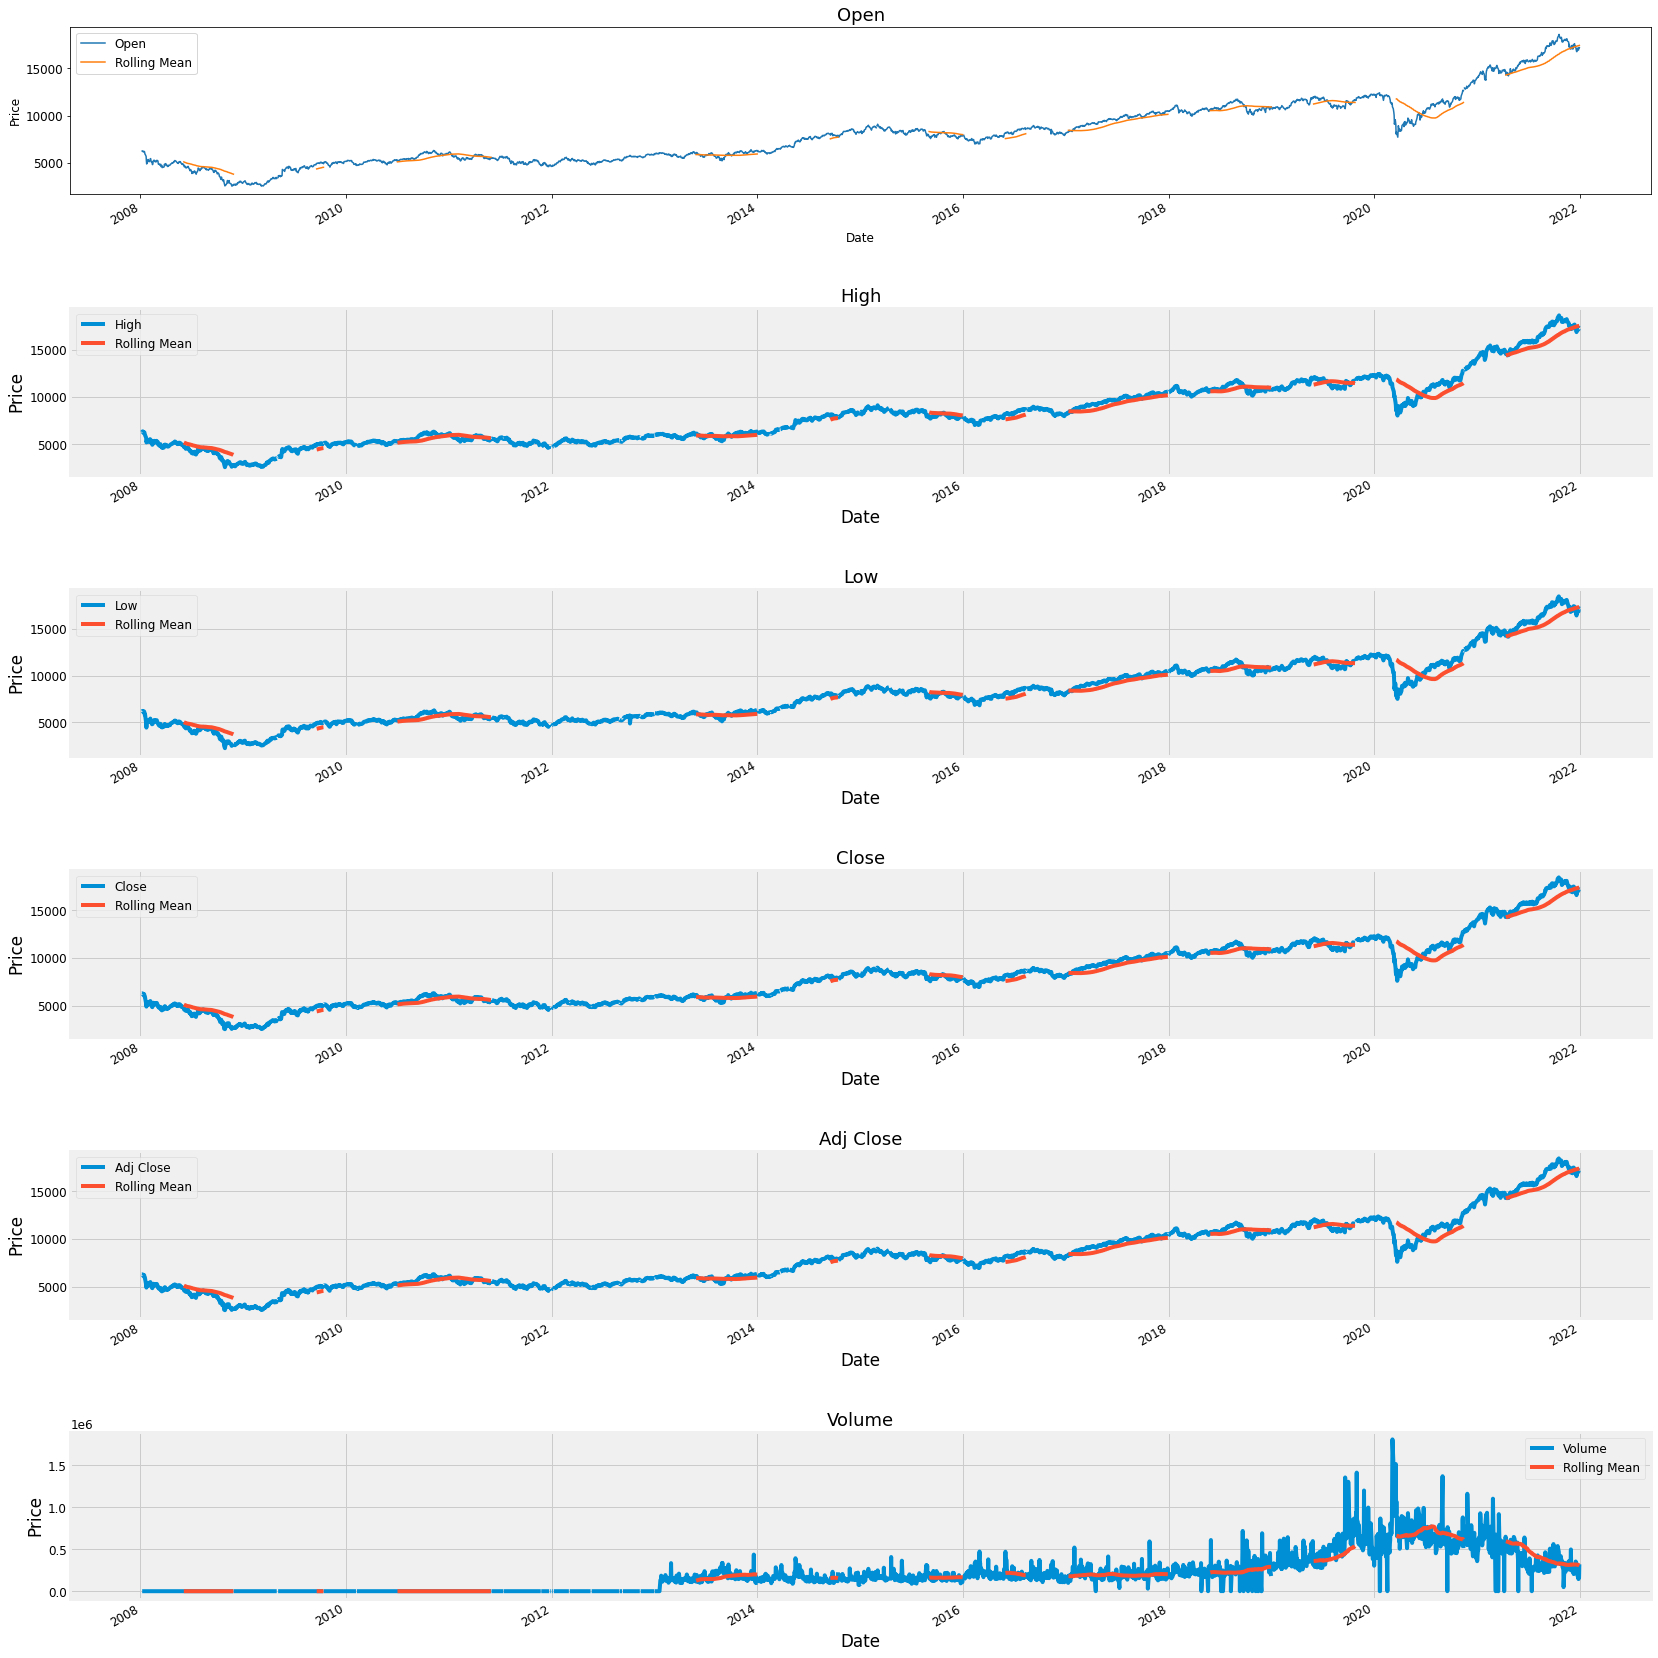

In [ ]:
col_names = data.columns

fig = plt.figure(figsize=(24, 24))
for i in range(6):
  ax = fig.add_subplot(6,1,i+1)
  ax.plot(data.iloc[:,i],label=col_names[i])
  data.iloc[:,i].rolling(100).mean().plot(label='Rolling Mean')
  ax.set_title(col_names[i],fontsize=18)
  ax.set_xlabel('Date')
  ax.set_ylabel('Price')
  ax.patch.set_edgecolor('black')  
  plt.style.context('fivethirtyeight')
  plt.legend(prop={'size': 12})
  plt.style.use('fivethirtyeight')

fig.tight_layout(pad=3.0)

plt.show()

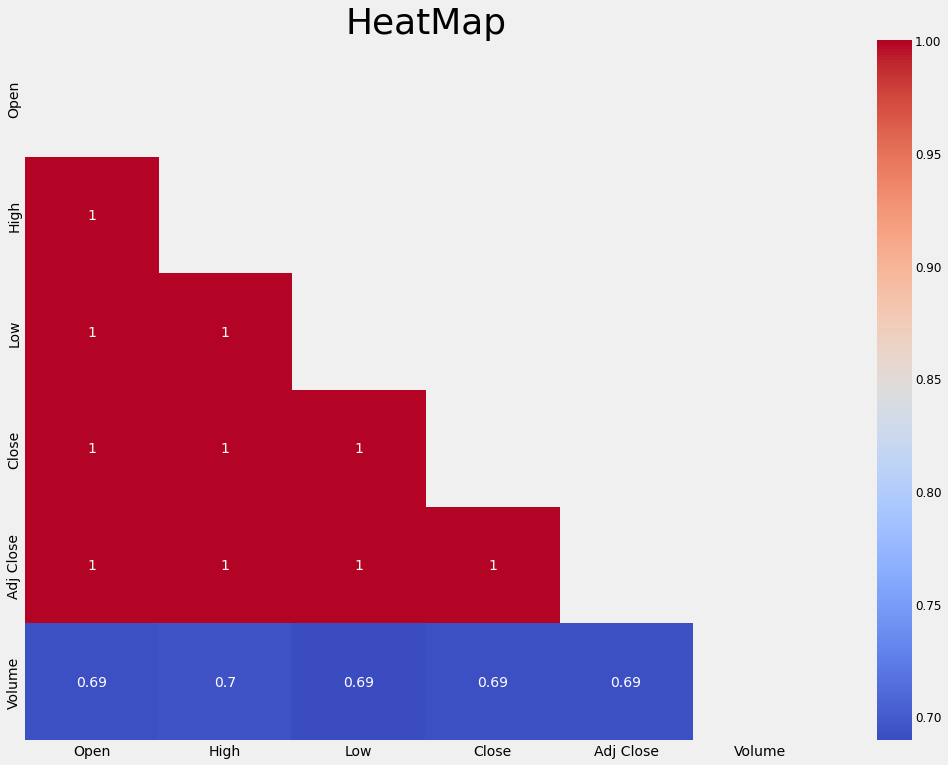

In [ ]:
fig = plt.figure(figsize=(16,12))
matrix = np.triu(data.corr())
ax = sns.heatmap(data.corr(),annot=True,annot_kws={"size":14},mask=matrix,cmap='coolwarm')
ax.tick_params(labelsize=14)
sns.set(font_scale=3)
ax.set_title('HeatMap')
plt.style.use('fivethirtyeight')
plt.show()

In [ ]:
data_feature_selected = data.drop(axis=1,labels=['Open','High','Low','Close','Volume'])


In [ ]:
col_order = ['Date','Adj Close']
data_feature_selected = data_feature_selected.reindex(columns=col_order)
data_feature_selected

,Date,Adj Close
Date,,
2008-01-07,2008-01-07,6279.100098
2008-01-08,2008-01-08,6287.850098
2008-01-09,2008-01-09,6272.000000
2008-01-10,2008-01-10,6156.950195
2008-01-11,2008-01-11,6200.100098
...,...,...
2021-12-24,2021-12-24,17003.750000
2021-12-27,2021-12-27,17086.250000
2021-12-28,2021-12-28,17233.250000


In [ ]:
monthly_mean = data_feature_selected['Adj Close'].resample('M').mean()


In [ ]:
monthly_data = monthly_mean.to_frame()
monthly_data

,Adj Close
Date,
2008-01-31,5664.186858
2008-02-29,5201.564267
2008-03-31,4769.497233
2008-04-30,4901.904956
2008-05-31,5028.662500
...,...
2021-08-31,16470.459449
2021-09-30,17508.614304
2021-10-31,18020.220020


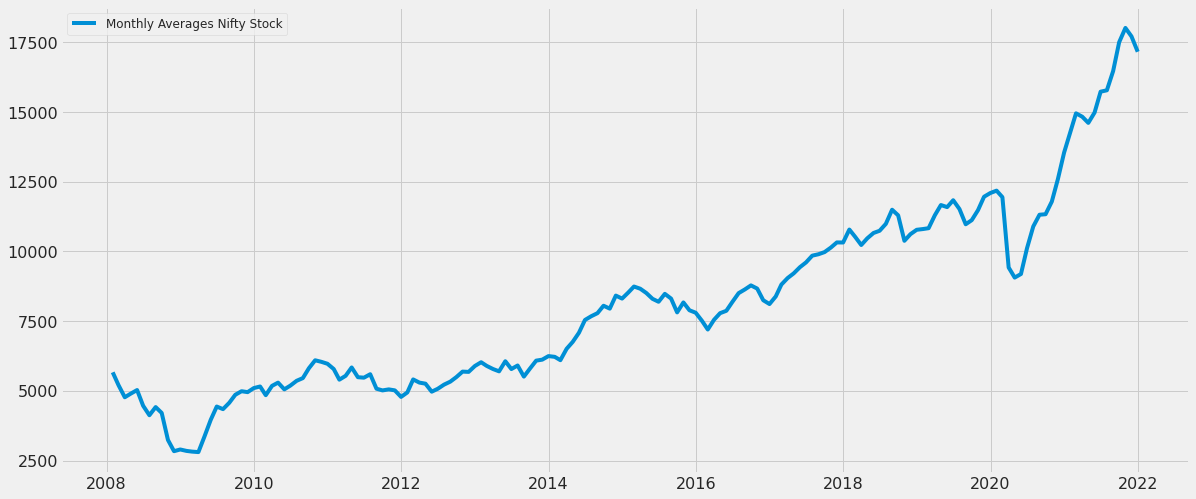

In [ ]:
fig = plt.figure(figsize=(18,8))
plt.plot(monthly_data['Adj Close'],label='Monthly Averages Nifty Stock')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax.set_title('Monthly Resampled Data')
plt.style.use('fivethirtyeight')
plt.legend(prop={'size': 12})
plt.show()

In [ ]:
monthly_data['Year'] = monthly_data.index.year
monthly_data['Month'] = monthly_data.index.strftime('%B')
monthly_data['dayofweek'] = monthly_data.index.strftime('%A')
monthly_data['quarter'] = monthly_data.index.quarter
monthly_data

,Adj Close,Year,Month,dayofweek,quarter
Date,,,,,
2008-01-31,5664.186858,2008,January,Thursday,1
2008-02-29,5201.564267,2008,February,Friday,1
2008-03-31,4769.497233,2008,March,Monday,1
2008-04-30,4901.904956,2008,April,Wednesday,2
2008-05-31,5028.662500,2008,May,Saturday,2
...,...,...,...,...,...
2021-08-31,16470.459449,2021,August,Tuesday,3
2021-09-30,17508.614304,2021,September,Thursday,3
2021-10-31,18020.220020,2021,October,Sunday,4


(array([0.00e+00, 2.50e-05, 5.00e-05, 7.50e-05, 1.00e-04, 1.25e-04,
        1.50e-04, 1.75e-04, 2.00e-04, 2.25e-04]),
 <a list of 10 Text major ticklabel objects>)

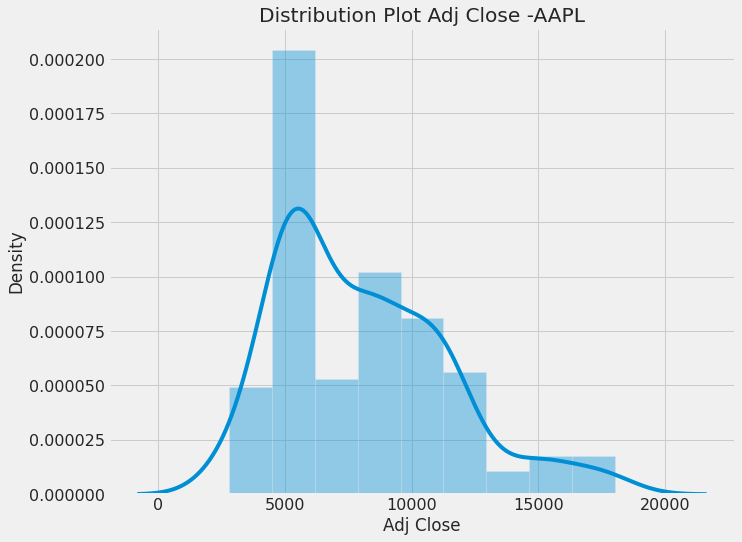

In [ ]:
##Checking Distribution of Our Data 
fig = plt.figure(figsize=(10,8))
sns.distplot(monthly_data['Adj Close']).set_title("Distribution Plot Adj Close -AAPL")
ax.tick_params(labelsize=12)
sns.set(font_scale=1)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)


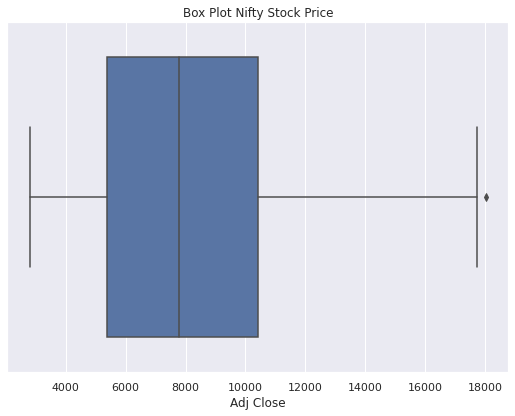

In [ ]:
fig = plt.figure(figsize=(8,6))
sns.boxplot(monthly_data['Adj Close']).set_title('Box Plot Nifty Stock Price')
plt.style.context('fivethirtyeight')

Text(0.5, 1.0, 'QQ Plot NSEI Stock Price')

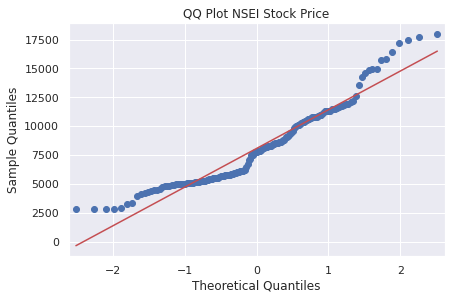

In [ ]:
qq_plot = qq(monthly_data['Adj Close'],line='s')
plt.title('QQ Plot NSEI Stock Price')

In [ ]:
print('Skewness of Distribution is ',monthly_data['Adj Close'].skew())
print('Kurtosis of Distribution is ',monthly_data['Adj Close'].kurtosis())

Skewness of Distribution is  0.8411406138355426
Kurtosis of Distribution is  0.33330205220216236


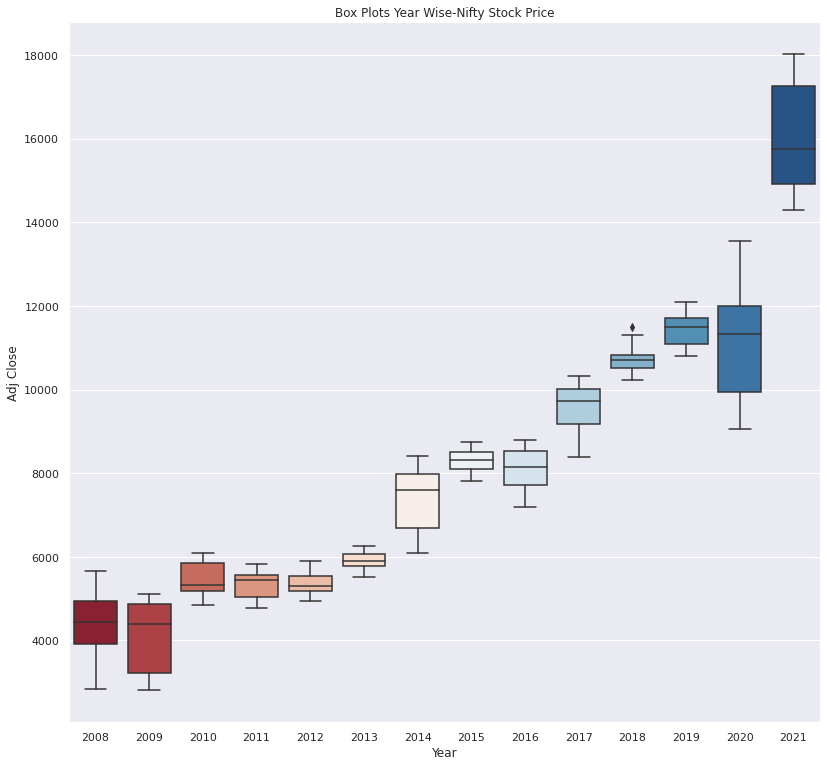

In [ ]:
plt.figure(figsize=(12,12))
ax = sns.boxplot(x=monthly_data['Year'],y=monthly_data['Adj Close'],palette='RdBu')
ax.set_title('Box Plots Year Wise-Nifty Stock Price')
plt.style.context('fivethirtyeight')

In [ ]:
group_by_yr = []
list_years = monthly_data['Year'].unique()
dict_IQR = {}
for yr in list_years:
  group_by_yr.append('df' + str(yr)) 

for enum,yr in enumerate(list_years):
   group_by_yr[enum] = monthly_data[str(yr)]['Adj Close']
   dict_IQR[str(yr)] = stats.iqr(group_by_yr[enum])

In [ ]:
##Interquartile Range(IQR) Year Wise for Stock Price
dict_IQR


{'2008': 1030.6693597606127,
 '2009': 1651.7587051105652,
 '2010': 678.775969155502,
 '2011': 509.486067378748,
 '2012': 353.9550098507625,
 '2013': 285.68824882508216,
 '2014': 1282.2955011918002,
 '2015': 413.92451036666716,
 '2016': 811.5261402303568,
 '2017': 845.4134798698051,
 '2018': 320.07878382043236,
 '2019': 622.2533010559218,
 '2020': 2063.4631783732,
 '2021': 2325.319859422183}

Text(0, 0.5, 'InterQuartile Range')

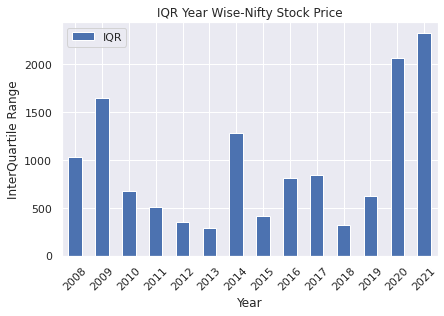

In [ ]:
IQR_df = pd.DataFrame(dict_IQR.items(),columns=['Year','IQR'])
IQR_df.index = IQR_df['Year']
IQR_df.plot(kind='bar')
plt.xticks(rotation=45)
plt.style.context('fivethirtyeight')
plt.title('IQR Year Wise-Nifty Stock Price')
plt.ylabel('InterQuartile Range')

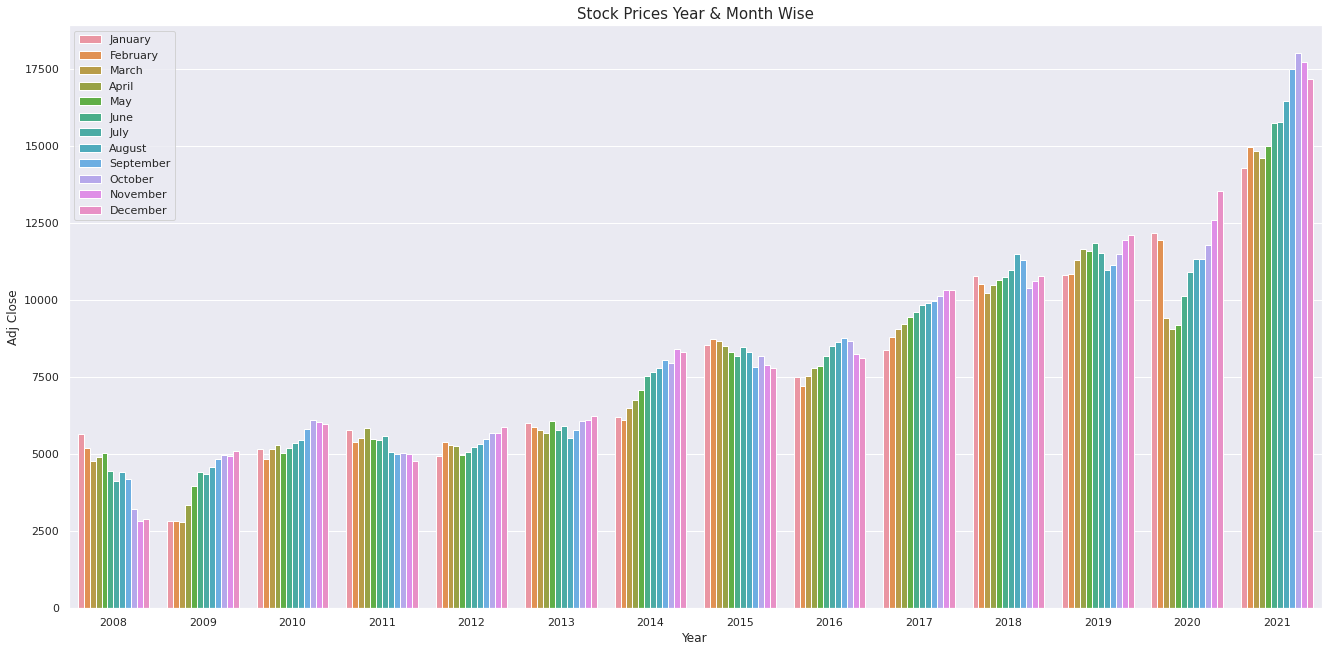

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
palette = sns.color_palette("mako_r", 4)
a = sns.barplot(x="Year", y="Adj Close",hue = 'Month',data=monthly_data)
a.set_title("Stock Prices Year & Month Wise",fontsize=15)
plt.legend(loc='upper left')
plt.show()

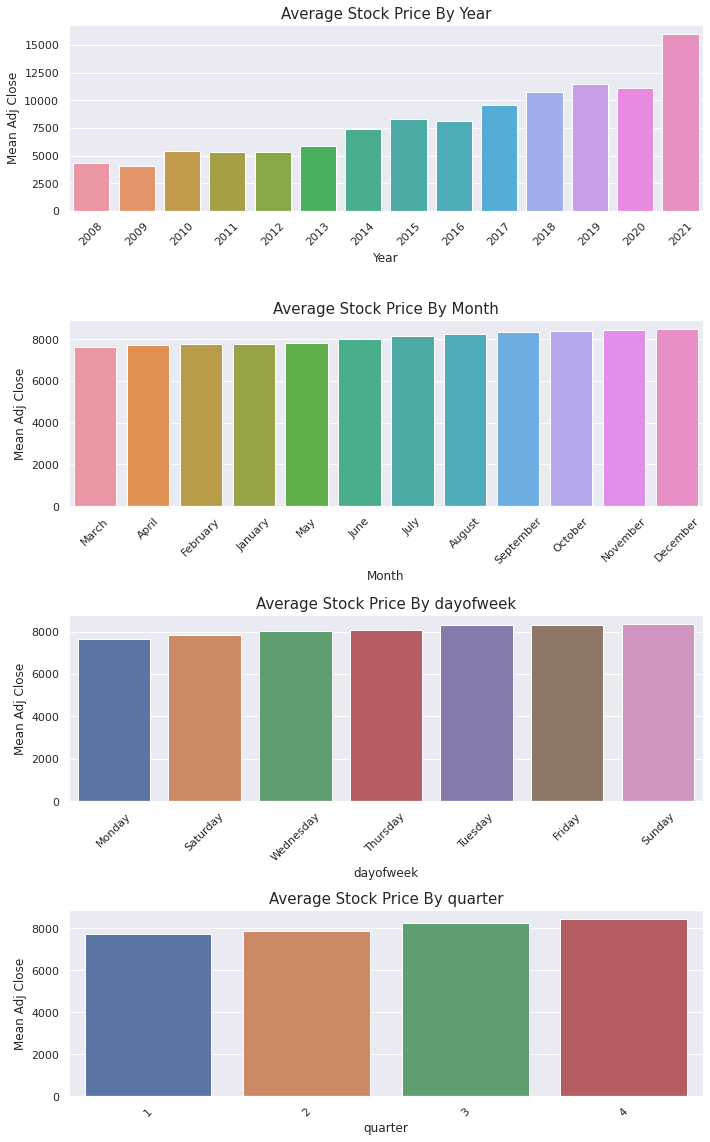

In [ ]:
fig = plt.figure(figsize=(10,16))
fig.set_size_inches(10,16)
group_cols = monthly_data.columns

for enum,i in enumerate(group_cols[1:]):
  ax = fig.add_subplot(4,1,enum+1)
  Aggregated = pd.DataFrame(monthly_data.groupby(str(i))["Adj Close"].mean()).reset_index().sort_values('Adj Close')
  sns.barplot(data=Aggregated,x=str(i),y="Adj Close",ax=ax)
  ax.set(xlabel=str(i), ylabel='Mean Adj Close')
  ax.set_title("Average Stock Price By {}".format(str(i)),fontsize=15)
  plt.xticks(rotation=45)
  
plt.tight_layout(pad=1)

<Figure size 1440x1152 with 0 Axes>

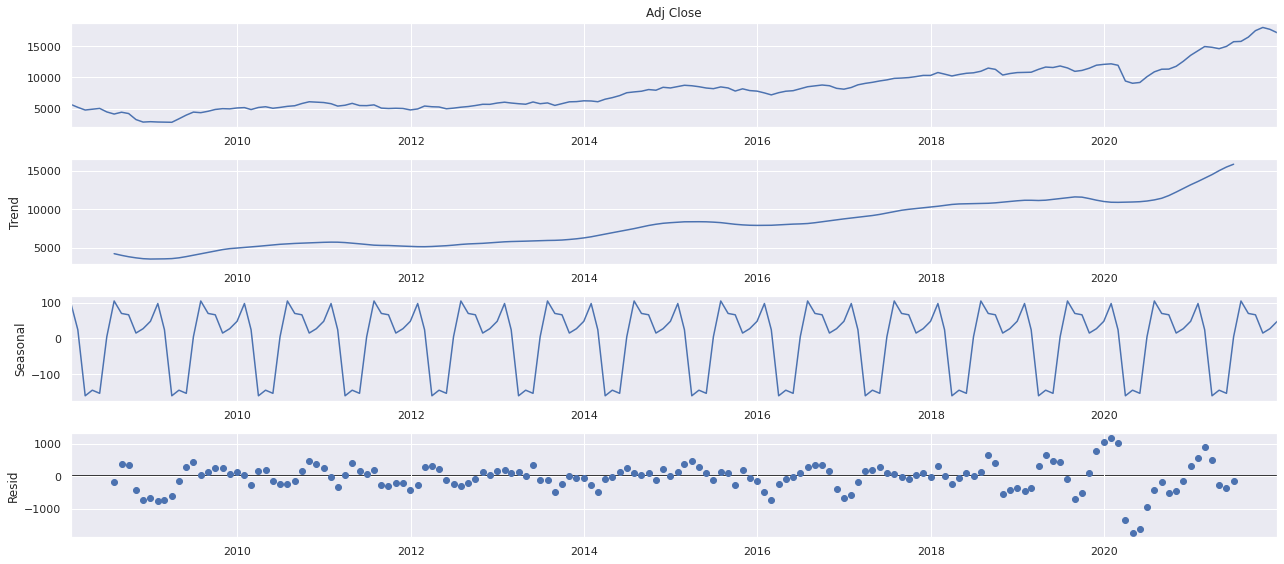

In [ ]:
rcParams['figure.figsize'] = 18, 8
plt.figure(figsize=(20,16))
decomposed_series = sd(monthly_data['Adj Close'],model='additive')
decomposed_series.plot()
plt.show()

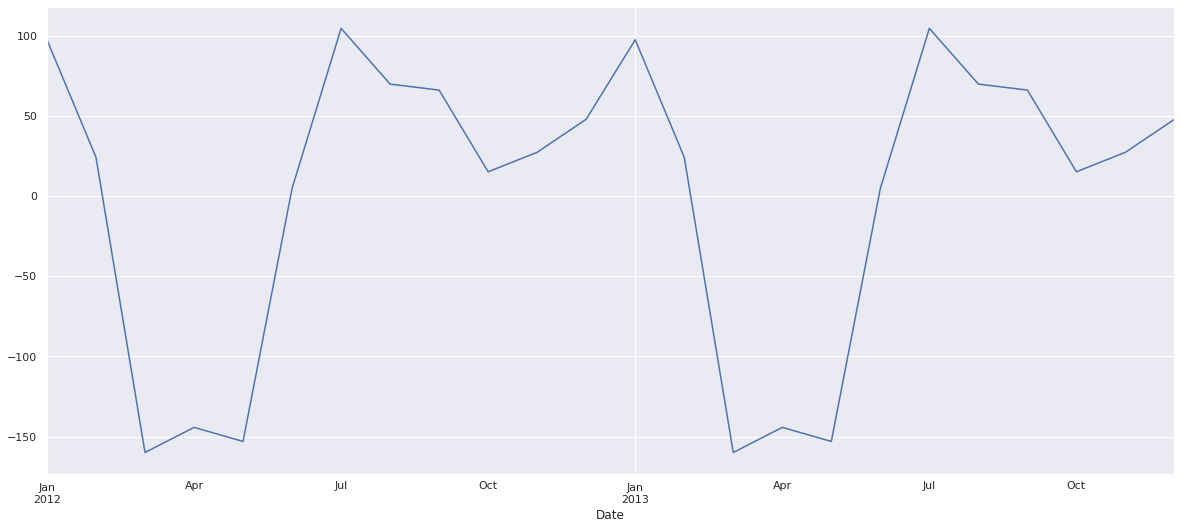

<Figure size 576x576 with 0 Axes>

In [ ]:
decomposed_series.seasonal['2012':'2013'].plot()
fig = plt.figure(figsize=(8,8))

In [ ]:
def ad_fuller_func(X):
  result_ad_fuller = adfuller(X)
  print('ADF Statistic: %f' % result_ad_fuller[0])
  print('p-value: %f' %result_ad_fuller[1])
  print('Critical Values:')
  for key, value in result_ad_fuller[4].items():
	  print('\t%s: %.3f' % (key, value))
 
  if result_ad_fuller[0] < result_ad_fuller[4]['5%']:
    print('Reject Null Hypothesis(Ho)-Time Series is Stationary')
  else:
    print('Failed to Reject Ho-Time Series is Non-Stationary')

In [ ]:
ad_fuller_func(monthly_data['Adj Close'])


ADF Statistic: 0.865818
p-value: 0.992628
Critical Values:
	1%: -3.471
	5%: -2.879
	10%: -2.576
Failed to Reject Ho-Time Series is Non-Stationary


Text(0.5, 0, 'Lags')

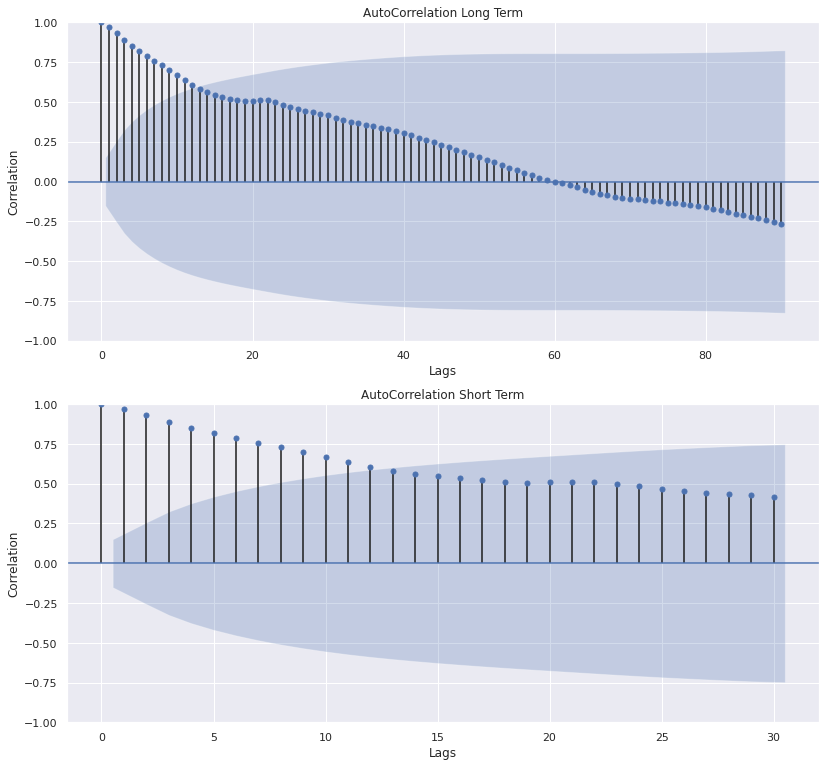

In [ ]:
fig,(ax1,ax2) = plt.subplots(2,figsize=(12,12))
acf = plot_acf(monthly_data['Adj Close'],lags=90,ax=ax1)
ax1.set_title('AutoCorrelation Long Term')
acf = plot_acf(monthly_data['Adj Close'],lags=30,ax=ax2)
ax2.set_title('AutoCorrelation Short Term')
ax1.set_ylabel('Correlation')
ax1.set_xlabel('Lags')
ax2.set_ylabel('Correlation')
ax2.set_xlabel('Lags')


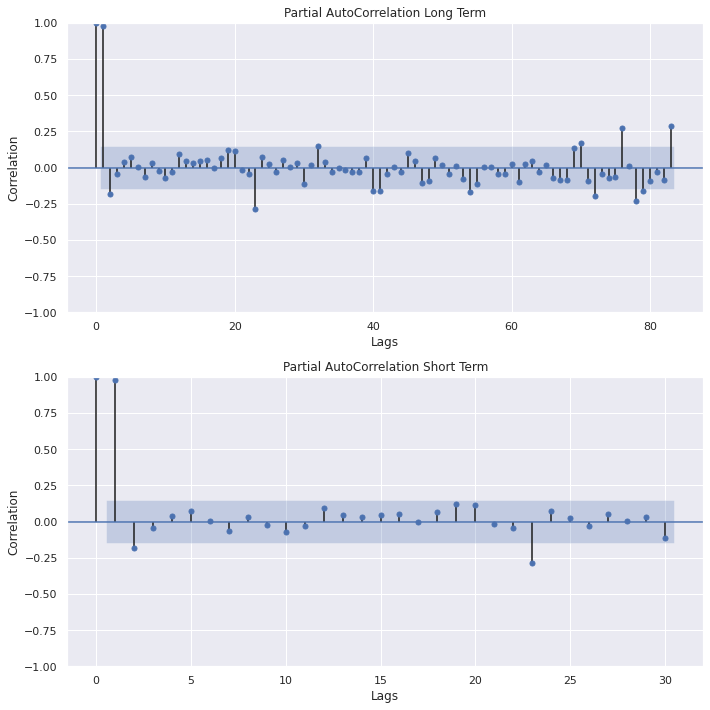

In [ ]:
fig,(ax1,ax2) = plt.subplots(2,figsize=(10,10))
pacf = plot_pacf(monthly_data['Adj Close'],lags=83,ax=ax1)
ax1.set_title('Partial AutoCorrelation Long Term')
pacf = plot_pacf(monthly_data['Adj Close'],lags=30,ax=ax2)
ax2.set_title('Partial AutoCorrelation Short Term')
ax1.set_ylabel('Correlation')
ax1.set_xlabel('Lags')
ax2.set_ylabel('Correlation')
ax2.set_xlabel('Lags')
plt.tight_layout(pad=1)

In [ ]:
##Differencing By 1
monthly_diff = monthly_data['Adj Close'] - monthly_data['Adj Close'].shift(1)

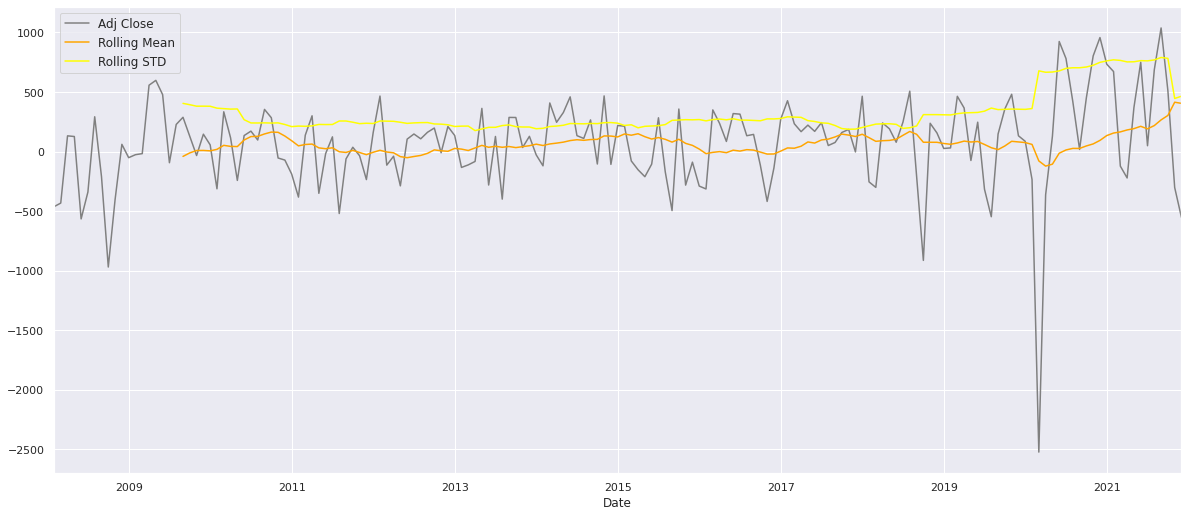

In [ ]:
monthly_diff[1:].plot(c='grey')
monthly_diff[1:].rolling(20).mean().plot(label='Rolling Mean',c='orange')
monthly_diff[1:].rolling(20).std().plot(label='Rolling STD',c='yellow')
plt.legend(prop={'size': 12})

In [ ]:
##Checking if Time Series is Stationary by Running ADF Test
ad_fuller_func(monthly_diff[1:])

ADF Statistic: -8.436594
p-value: 0.000000
Critical Values:
	1%: -3.471
	5%: -2.879
	10%: -2.576
Reject Null Hypothesis(Ho)-Time Series is Stationary


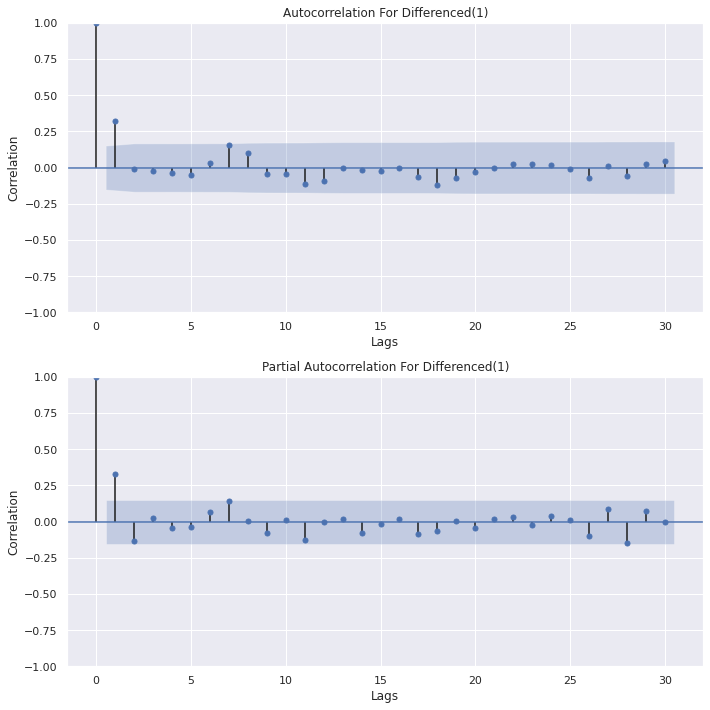

In [ ]:
fig,(ax1,ax2) = plt.subplots(2,figsize=(10,10))
acf = plot_acf(monthly_diff[1:],lags=30,ax=ax1)
pacf = plot_pacf(monthly_diff[1:],lags=30,ax=ax2)
ax1.set_title('Autocorrelation For Differenced(1)')
ax1.set_ylabel('Correlation')
ax1.set_xlabel('Lags')
ax2.set_title('Partial Autocorrelation For Differenced(1)')
ax2.set_ylabel('Correlation')
ax2.set_xlabel('Lags')
plt.tight_layout(pad=1)

In [ ]:
modelling_series = monthly_data['Adj Close']
modelling_series

Date
2008-01-31     5664.186858
2008-02-29     5201.564267
2008-03-31     4769.497233
2008-04-30     4901.904956
2008-05-31     5028.662500
                  ...     
2021-08-31    16470.459449
2021-09-30    17508.614304
2021-10-31    18020.220020
2021-11-30    17718.892383
2021-12-31    17166.097568
Freq: M, Name: Adj Close, Length: 168, dtype: float64

In [ ]:
train,test = split(modelling_series,train_size=0.6,shuffle=False)

In [ ]:
train.head(2)

Date
2008-01-31    5664.186858
2008-02-29    5201.564267
Freq: M, Name: Adj Close, dtype: float64

In [ ]:
test.head(2)


Date
2016-05-31    7871.856778
2016-06-30    8191.197754
Freq: M, Name: Adj Close, dtype: float64

In [ ]:
print('Train',len(train))
print('Test',len(test))

Train 100
Test 68


In [ ]:
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of grid search Model parameter combinations for Seasonal-ARIMA')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))

Examples of grid search Model parameter combinations for Seasonal-ARIMA
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)


In [ ]:
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of grid search Model parameter combinations for Seasonal-ARIMA')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))

Examples of grid search Model parameter combinations for Seasonal-ARIMA
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)


In [ ]:
list_param = []
list_param_seasonal=[]
list_results_aic=[]

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            model = sm.tsa.statespace.SARIMAX(train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = model.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            
            list_param.append(param)
            list_param_seasonal.append(param_seasonal)
            list_results_aic.append(results.aic)
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:2006.0455134839658
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1723.1463054114286
ARIMA(0, 0, 0)x(0, 0, 2, 12)12 - AIC:1444.7048882913846
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1484.3566492673872
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1271.8032282004676
ARIMA(0, 0, 0)x(0, 1, 2, 12)12 - AIC:2654.0203132897987
ARIMA(0, 0, 0)x(0, 2, 0, 12)12 - AIC:1334.3595001235362
ARIMA(0, 0, 0)x(0, 2, 1, 12)12 - AIC:1073.9243607328217
ARIMA(0, 0, 0)x(0, 2, 2, 12)12 - AIC:2209.2350746900547
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1498.840591497089
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1450.8359094889786
ARIMA(0, 0, 0)x(1, 0, 2, 12)12 - AIC:1216.2511560416156
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1291.0190479121202
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1270.1719463718364
ARIMA(0, 0, 0)x(1, 1, 2, 12)12 - AIC:2686.400819919261
ARIMA(0, 0, 0)x(1, 2, 0, 12)12 - AIC:1109.4320449151646
ARIMA(0, 0, 0)x(1, 2, 1, 12)12 - AIC:1073.0805010615709
ARIMA(0, 0, 0)x(1, 2, 2, 12)12 - AIC:2528.91522198

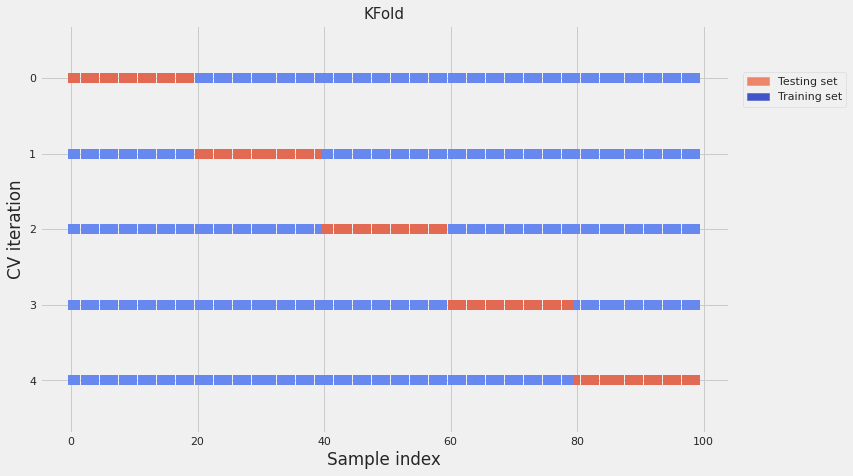

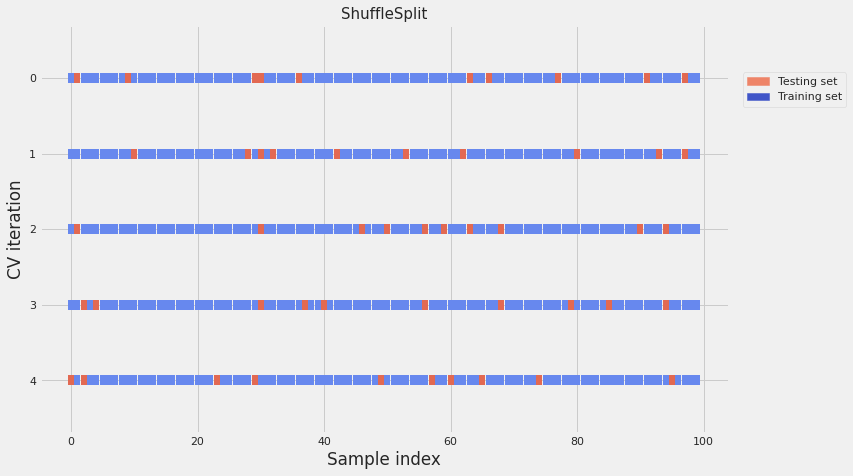

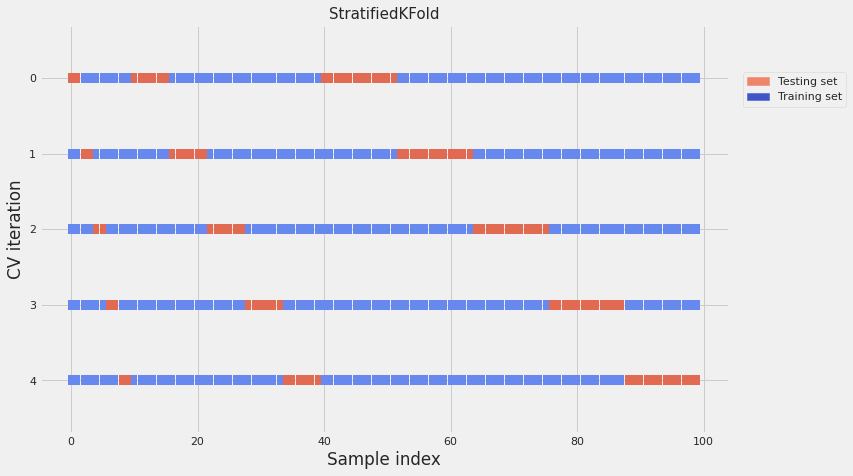

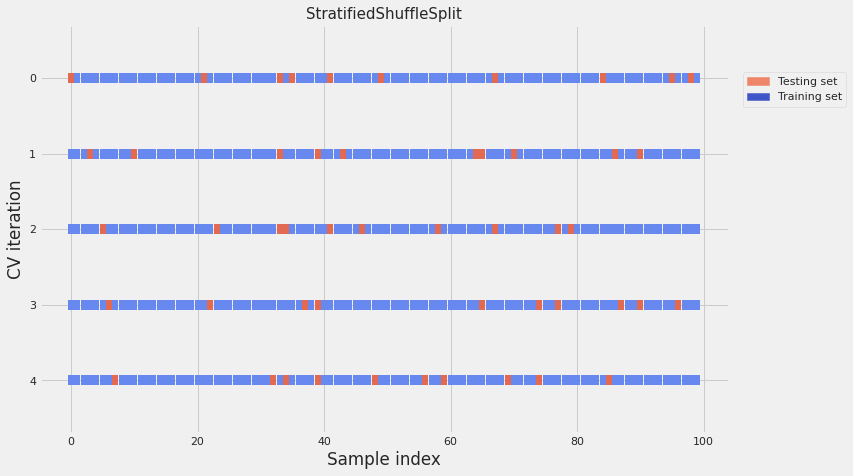

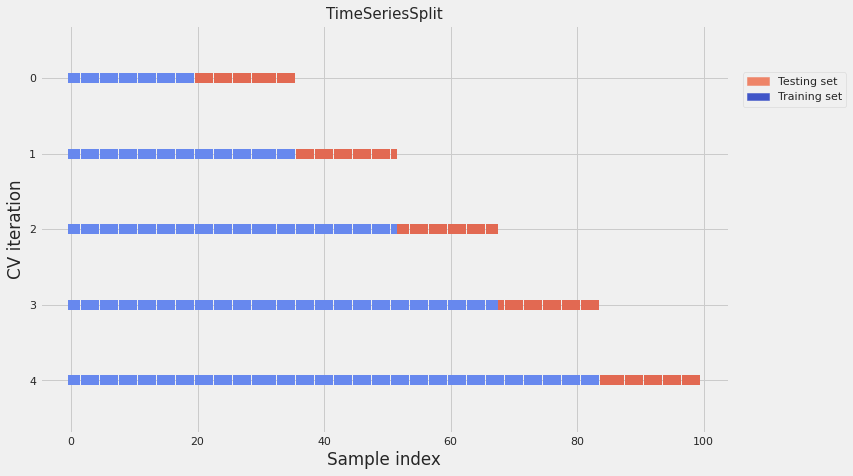

In [ ]:
pd.options.display.max_columns = 30
plt.rcParams.update({'figure.max_open_warning': 0})
plt.style.use('fivethirtyeight')
cmap_data = plt.cm.Paired
cmap_cv = plt.cm.coolwarm
warnings.filterwarnings('ignore')

cvs = [KFold, ShuffleSplit, StratifiedKFold, StratifiedShuffleSplit, TimeSeriesSplit]
n_points = 100
n_splits = 5
X = np.random.randn(100, 10)
percentiles_classes = [.1, .3, .6]
y = np.hstack([[ii] * int(100 * perc) for ii, perc in enumerate(percentiles_classes)])

# Function modified from https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html

def plot_cv_indices(cv, n_splits, X, y, date_col = None):
    """Create a sample plot for indices of a cross-validation object."""
    
    fig, ax = plt.subplots(1, 1, figsize = (11, 7))
    
    # Generate the training/testing visualizations for each CV split
    for ii, (tr, tt) in enumerate(cv.split(X=X, y=y)):
        # Fill in indices with the training/test groups
        indices = np.array([np.nan] * len(X))
        indices[tt] = 1
        indices[tr] = 0

        # Visualize the results
        ax.scatter(range(len(indices)), [ii + .5] * len(indices),
                   c=indices, marker='_', lw=10, cmap=cmap_cv,
                   vmin=-.2, vmax=1.2)


    # Formatting
    yticklabels = list(range(n_splits))
    
    if date_col is not None:
        tick_locations  = ax.get_xticks()
        tick_dates = [" "] + date_col.iloc[list(tick_locations[1:-1])].astype(str).tolist() + [" "]

        tick_locations_str = [str(int(i)) for i in tick_locations]
        new_labels = ['\n\n'.join(x) for x in zip(list(tick_locations_str), tick_dates) ]
        ax.set_xticks(tick_locations)
        ax.set_xticklabels(new_labels)
    
    ax.set(yticks=np.arange(n_splits+2) + .5, yticklabels=yticklabels,
           xlabel='Sample index', ylabel="CV iteration",
           ylim=[n_splits+0.2, -.2])
    ax.legend([Patch(color=cmap_cv(.8)), Patch(color=cmap_cv(.02))],
              ['Testing set', 'Training set'], loc=(1.02, .8))
    ax.set_title('{}'.format(type(cv).__name__), fontsize=15)
    

for i, cv in enumerate(cvs):
    this_cv = cv(n_splits=n_splits)
    plot_cv_indices(this_cv, n_splits, X, y, date_col=None)

In [ ]:
## Using TimeSeriesSplit from sklearn library
time_series_splits = TimeSeriesSplit(n_splits=4)
X = modelling_series.values
pyplot.figure(1)
fig = plt.figure(figsize=(12, 12))

index = 1
for train_index, test_index in time_series_splits.split(X):
	train = X[train_index]
	test = X[test_index]
	print('Observations: %d' % (len(train) + len(test)))
	print('Training Observations: %d' % (len(train)))
	print('Testing Observations: %d' % (len(test)))
    
# 	pyplot.subplot(310 + index)
# 	pyplot.plot(train)
# 	pyplot.plot([None for i in train] + [x for x in test])
#     # pyplot.title(''.format())
# 	index += 1
# pyplot.show()

Observations: 69
Training Observations: 36
Testing Observations: 33
Observations: 102
Training Observations: 69
Testing Observations: 33
Observations: 135
Training Observations: 102
Testing Observations: 33
Observations: 168
Training Observations: 135
Testing Observations: 33


<Figure size 1296x576 with 0 Axes>

<Figure size 864x864 with 0 Axes>

In [ ]:
train_list = {}
test_list = {}
time_series_splits = TimeSeriesSplit(n_splits=5)
X = modelling_series.values

index = 1
for train_index, test_index in time_series_splits.split(X):
    train = X[train_index]
    test = X[test_index]
    train_list[index] = train
    test_list[index] = test
    index += 1

In [ ]:
def backtest_model(train,test):
    model = sm.tsa.SARIMAX(train,order=(1,1,1),seasonal_order=(2,2,0,12))
    results=model.fit()


    # train_get_dates_beginning = '2012-01-31'
    # train_get_dates_ending = str(modelling_series.index[len(train)].date())
    # test_get_dates_beginning = train_get_dates_ending
    # test_get_dates_ending = str(modelling_series.index[len(train)+len(test)].date())


    # forecasts_train = results.predict(start=train_get_dates_beginning,end=train_get_dates_ending)
    # forecasts_test = results.predict(start=test_get_dates_beginning,end=test_get_dates_ending)

    forecasts_train = results.predict(start=0,end=len(train))
    forecasts_test = results.predict(start=len(train),end=len(train)+len(test))


    fig,(ax1,ax2) = plt.subplots(2,figsize=(18,10))

    train = pd.DataFrame(train)
    test = pd.DataFrame(test)

    forecasts_train = pd.DataFrame(forecasts_train)
    forecasts_test = pd.DataFrame(forecasts_test)

    forecasts_train.plot(label='Forecasts',ax=ax1,title='SARIMA Forecasting -Train Data')
    train.plot(label='Actual',ax=ax1)
    ax1.set_ylabel('Stock Price')
    ax1.set_xlabel('Time')


    forecasts_test.plot(label='Forecasts',ax=ax2,title='SARIMA Forecasting -Test Data')
    test.plot(label='Actual',ax=ax2)
    ax2.set_ylabel('Stock Price')
    ax2.set_xlabel('Time')


    
    

    ax1.legend()
    ax2.legend()
    plt.tight_layout(pad=2)

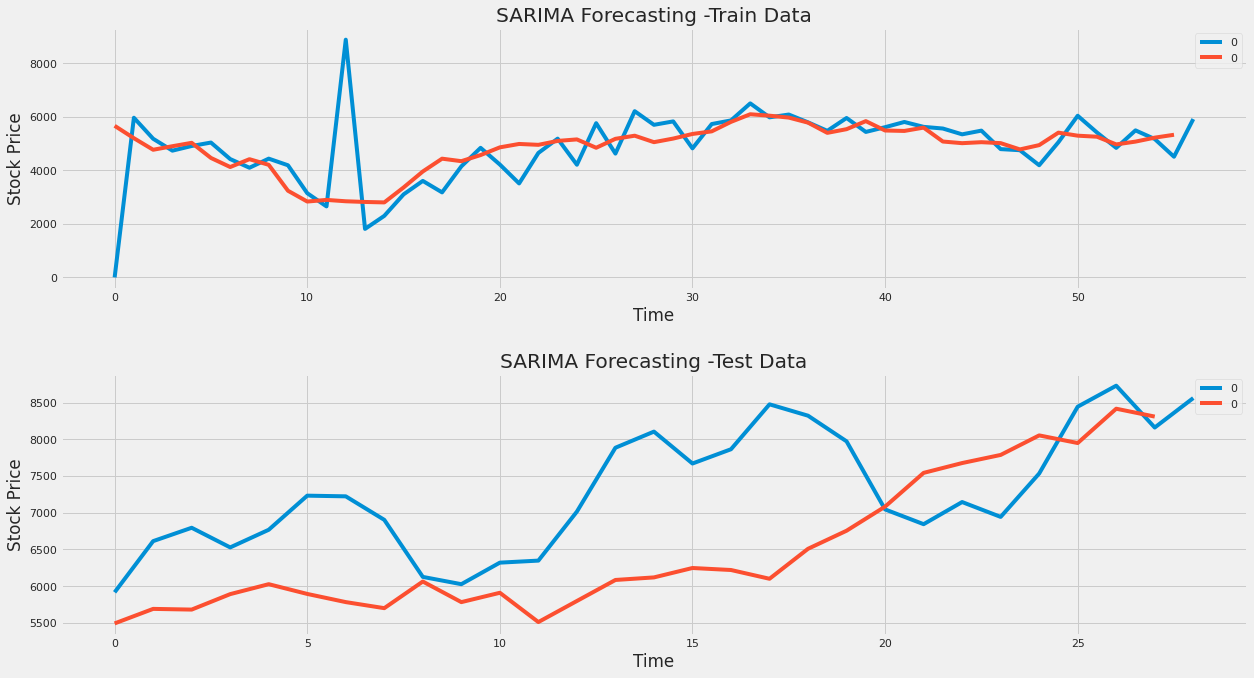

In [ ]:
backtest_model(train_list[2],test_list[2])


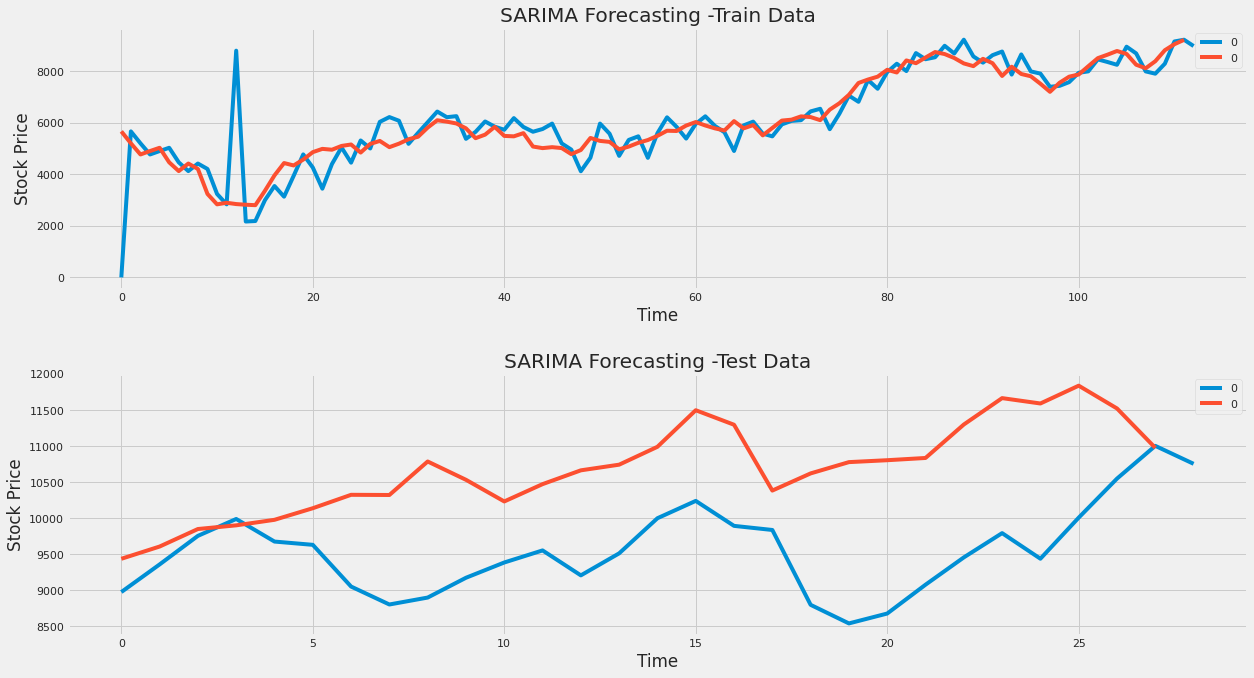

In [ ]:
backtest_model(train_list[4],test_list[4])

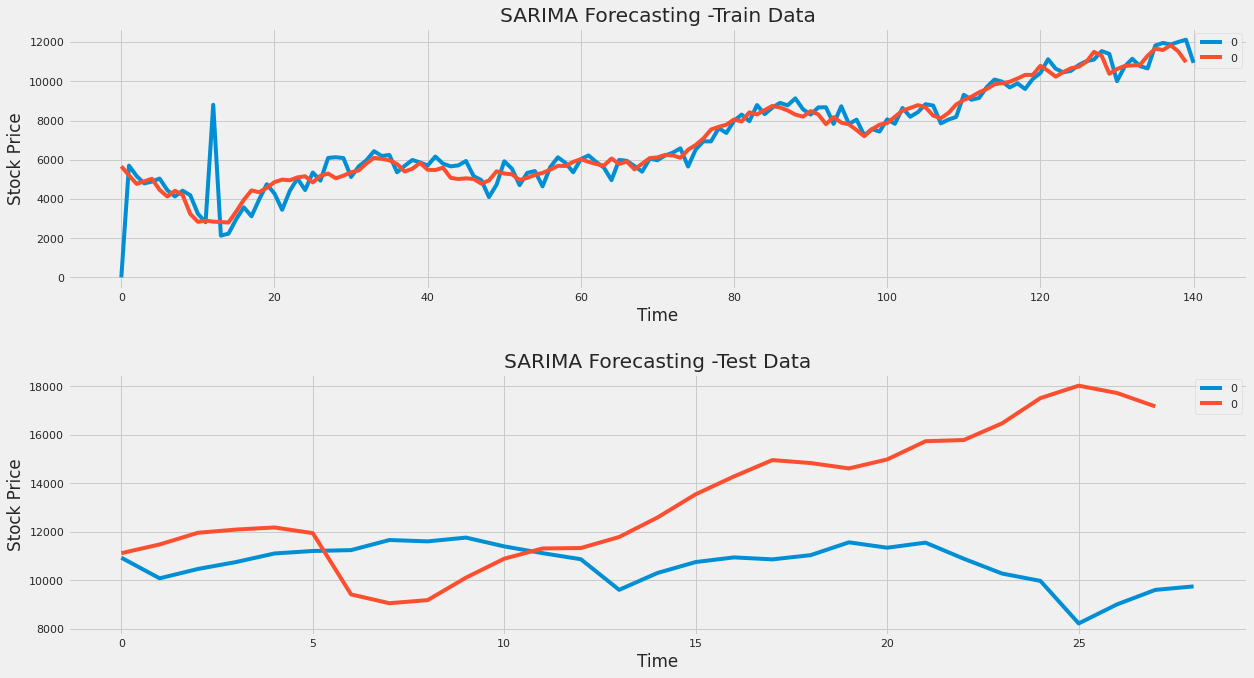

In [ ]:
## Backtest Set-4
backtest_model(train_list[5],test_list[5])

In [ ]:
model = sm.tsa.SARIMAX(train,order=(1,1,1),seasonal_order=(2,2,0,12))
results=model.fit()


# forecasts_train = results.predict(start='01-01-2008',end='30-09-2016')
# forecasts_test = results.predict(start='31-10-2016',end='31-12-2021')
